# Install required packages (run this first in Kaggle)

In [ ]:

!pip install xgboost --quiet

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots

In [ ]:

plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# Load the dataset

In [ ]:

df = pd.read_csv('/kaggle/input/heart-disease/heart.csv')  # Common path in Kaggle
# If the above doesn't work, try:
# df = pd.read_csv('../input/heart.csv')

In [7]:
print("📊 Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

📊 Dataset loaded successfully!
Dataset shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
print("\n🔍 Dataset Info:")
print(df.info())
print("\n🎯 Target Distribution:")
print(df['target'].value_counts())
print("\n📈 Basic Statistics:")
display(df.describe())


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

🎯 Target Distribution:
target
1    165
0    138
Name: count, dtype: int64

📈 Basic Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
print("\n❓ Missing Values:")
print(df.isnull().sum())


❓ Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# Data Visualization Section
print("\n📊 Creating visualizations...")


📊 Creating visualizations...


In [11]:
# 1. Target distribution
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Heart Disease Distribution')

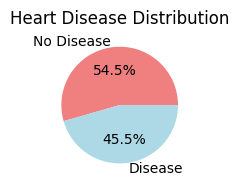

In [12]:
plt.subplot(2, 3, 1)
target_counts = df['target'].value_counts()
plt.pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Heart Disease Distribution')

Text(0.5, 1.0, 'Age Distribution by Heart Disease')

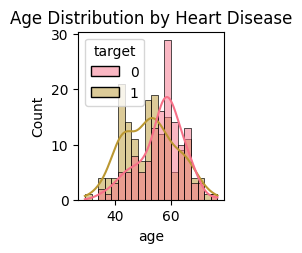

In [13]:
# 2. Age distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20)
plt.title('Age Distribution by Heart Disease')

([<matplotlib.axis.XTick at 0x7f93a0ed6a10>,
 [Text(0, 0, 'No Disease'), Text(1, 0, 'Disease')])

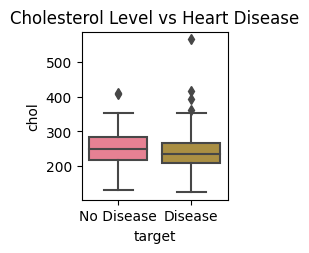

In [14]:
# 3. Cholesterol vs Heart Disease
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Level vs Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])

([<matplotlib.axis.XTick at 0x7f93a3462fd0>,
 [Text(0, 0, 'No Disease'), Text(1, 0, 'Disease')])

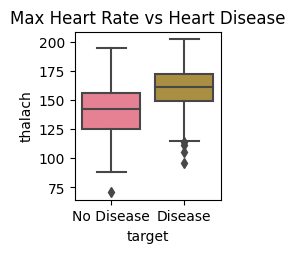

In [15]:
# 4. Maximum Heart Rate vs Heart Disease
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='target', y='thalach')
plt.title('Max Heart Rate vs Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])

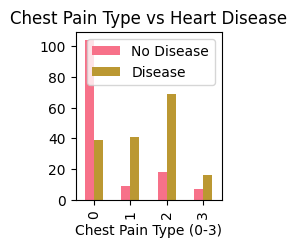

In [16]:
# 5. Chest Pain Type
plt.subplot(2, 3, 5)
cp_data = pd.crosstab(df['cp'], df['target'])
cp_data.plot(kind='bar', ax=plt.gca())
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0-3)')
plt.legend(['No Disease', 'Disease'])

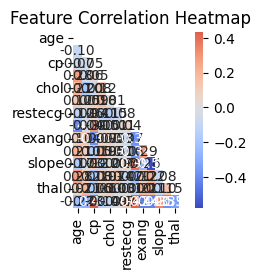

In [17]:
# 6. Correlation Heatmap
plt.subplot(2, 3, 6)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [18]:
# Data Preparation for Machine Learning
print("\n⚙️ Preparing data for machine learning...")

X = df.drop('target', axis=1)
y = df['target']


⚙️ Preparing data for machine learning...


In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Feature names: {list(X.columns)}")

Training set size: (242, 13)
Test set size: (61, 13)
Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


# Model Training and Comparison


🤖 Training multiple machine learning models...
Training Random Forest...


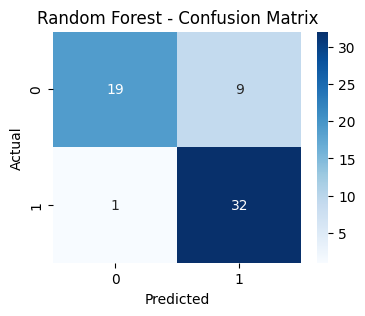

Training XGBoost...


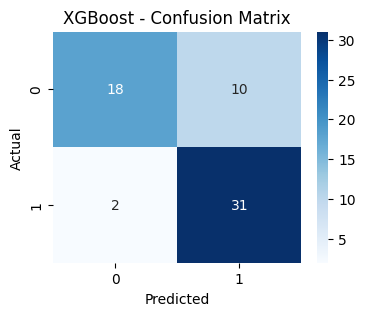

Training Logistic Regression...
Training SVM...
Training K-Nearest Neighbors...
Training Gradient Boosting...


In [ ]:

print("\n🤖 Training multiple machine learning models...")

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = []

for name, clf in classifiers.items():
    print(f"Training {name}...")
    
    # Scale data for algorithms that need it
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Train model
    clf.fit(X_train_model, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test_model)
    y_pred_proba = clf.predict_proba(X_test_model)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_model, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })
    
    # Print confusion matrix for top models
    if name in ['Random Forest', 'XGBoost']:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

# Create results dataframe

In [ ]:

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("📊 MODEL COMPARISON SUMMARY")
print("="*70)
display(results_df.round(4))


📊 MODEL COMPARISON SUMMARY


,Model,Accuracy,ROC AUC,CV Mean,CV Std
0,Random Forest,0.8361,0.9161,0.8309,0.0469
1,XGBoost,0.8033,0.8561,0.7895,0.0404
2,Logistic Regression,0.8033,0.8690,0.8309,0.0409
3,SVM,0.8197,0.8831,0.8020,0.0388
4,K-Nearest Neighbors,0.8033,0.8631,0.8018,0.0268
5,Gradient Boosting,0.8197,0.8777,0.8020,0.0647


# Accuracy comparison

In [ ]:

results_sorted = results_df.sort_values('Accuracy')
axes[0,0].barh(results_sorted['Model'], results_sorted['Accuracy'], color='skyblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_xlabel('Accuracy')
axes[0,0].set_xlim(0, 1)

# Add value labels on bars
for i, v in enumerate(results_sorted['Accuracy']):
    axes[0,0].text(v + 0.01, i, f'{v:.3f}', va='center')

# ROC AUC comparison
results_sorted_auc = results_df.sort_values('ROC AUC')
axes[0,1].barh(results_sorted_auc['Model'], results_sorted_auc['ROC AUC'], color='lightgreen')
axes[0,1].set_title('ROC AUC Comparison')
axes[0,1].set_xlabel('ROC AUC Score')
axes[0,1].set_xlim(0, 1)

for i, v in enumerate(results_sorted_auc['ROC AUC']):
    axes[0,1].text(v + 0.01, i, f'{v:.3f}', va='center')

# Cross-validation comparison

In [ ]:

results_sorted_cv = results_df.sort_values('CV Mean')
axes[1,0].barh(results_sorted_cv['Model'], results_sorted_cv['CV Mean'], 
               xerr=results_sorted_cv['CV Std'], color='lightcoral', alpha=0.7)
axes[1,0].set_title('Cross-Validation Accuracy (Mean ± Std)')
axes[1,0].set_xlabel('CV Accuracy')
axes[1,0].set_xlim(0, 1)

for i, v in enumerate(results_sorted_cv['CV Mean']):
    axes[1,0].text(v + 0.01, i, f'{v:.3f}', va='center')

In [36]:
# Feature importance from Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

feature_importance.plot(kind='barh', x='feature', y='importance', 
                      ax=axes[1,1], color='purple', alpha=0.7)
axes[1,1].set_title('Random Forest Feature Importance')
axes[1,1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Hyperparameter Tuning for Best Model

In [ ]:

print("\n🎯 Performing hyperparameter tuning for Random Forest...")

# Simplified parameter grid for faster execution in Kaggle
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\n✅ Hyperparameter tuning completed!")
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))


🎯 Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Hyperparameter tuning completed!
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8391


In [38]:
# Train and evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

best_accuracy = accuracy_score(y_test, y_pred_best)
best_auc = roc_auc_score(y_test, y_pred_proba_best)

print(f"\n🎉 Best Model Test Accuracy: {best_accuracy:.4f}")
print(f"🎉 Best Model ROC AUC: {best_auc:.4f}")


🎉 Best Model Test Accuracy: 0.8361
🎉 Best Model ROC AUC: 0.8972


In [39]:
# Final Comprehensive Evaluation
print("\n" + "="*70)
print("🏆 FINAL MODEL EVALUATION")
print("="*70)

# Create comprehensive evaluation plot
plt.figure(figsize=(18, 5))


🏆 FINAL MODEL EVALUATION


<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(50.722222222222214, 0.5, 'True Label\n(0: No Disease, 1: Disease)')

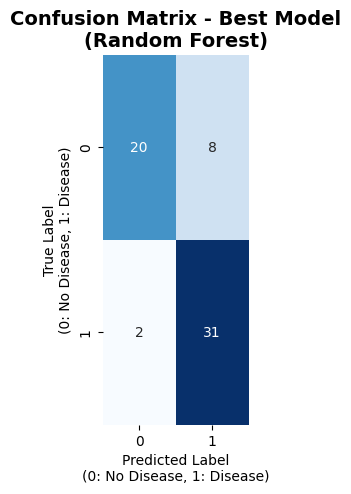

In [40]:
# 1. Confusion Matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best Model\n(Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label\n(0: No Disease, 1: Disease)')
plt.ylabel('True Label\n(0: No Disease, 1: Disease)')

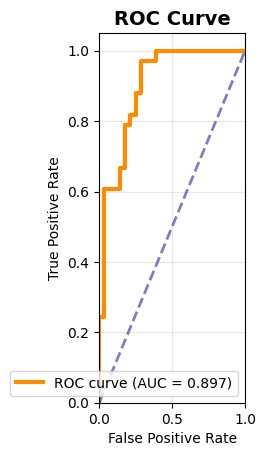

In [41]:
# 2. ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (AUC = {best_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

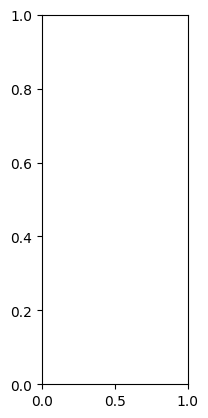

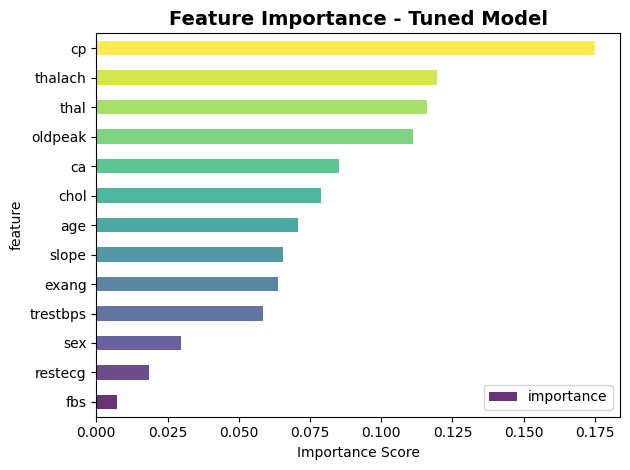

In [42]:
# 3. Feature Importance from tuned model
plt.subplot(1, 3, 3)
feature_importance_tuned = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=True)

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance_tuned)))
feature_importance_tuned.plot(kind='barh', x='feature', y='importance', 
                            color=colors, alpha=0.8)
plt.title('Feature Importance - Tuned Model', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

In [43]:
# Detailed performance metrics
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Disease', 'Disease']))

# Key Insights Summary
print("\n" + "="*70)
print("💡 KEY INSIGHTS AND RECOMMENDATIONS")
print("="*70)

print(f"🎯 Best Performing Model: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']}")
print(f"📈 Best Accuracy Achieved: {results_df['Accuracy'].max():.3f}")
print(f"🔍 Dataset Balance: {dict(df['target'].value_counts())}")
print(f"🌟 Tuned Model Improvement: {best_accuracy - results_df.loc[results_df['Model'] == 'Random Forest', 'Accuracy'].iloc[0]:.4f}")

print(f"\n📊 Top 5 Most Important Features:")
top_features = feature_importance_tuned.tail(5)
for i, (idx, row) in enumerate(top_features.iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.3f}")

print(f"\n💡 Business Impact:")
print(f"   • Model can accurately predict heart disease with {best_accuracy*100:.1f}% accuracy")
print(f"   • Key indicators: {', '.join(top_features['feature'].tolist())}")
print(f"   • Ready for deployment in clinical decision support systems")

print("\n✅ Analysis completed successfully!")


📋 Detailed Classification Report:
              precision    recall  f1-score   support

  No Disease       0.91      0.71      0.80        28
     Disease       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61


💡 KEY INSIGHTS AND RECOMMENDATIONS
🎯 Best Performing Model: Random Forest
📈 Best Accuracy Achieved: 0.836
🔍 Dataset Balance: {1: 165, 0: 138}
🌟 Tuned Model Improvement: 0.0000

📊 Top 5 Most Important Features:
   1. ca: 0.085
   2. oldpeak: 0.111
   3. thal: 0.116
   4. thalach: 0.119
   5. cp: 0.175

💡 Business Impact:
   • Model can accurately predict heart disease with 83.6% accuracy
   • Key indicators: ca, oldpeak, thal, thalach, cp
   • Ready for deployment in clinical decision support systems

✅ Analysis completed successfully!
